# Machine Learning Notebook
## EDA

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('./data/derstandard_frontpage_data.csv')

# prepare time data
df['datetime'] = pd.to_datetime(df['datetime'])
df['weekday'] = df['datetime'].dt.weekday
df


,title,subtitle,link,datetime,kicker,n_posts,storylabels,weekday
0,Liverpool nach großem Zittern im Ligacup-Halbf...,Minamino rettete die Reds in der Nachspielzeit...,https://www.derstandard.at/story/2000132122809...,2021-12-22 23:47:00,Premier League,7,NaN,2
1,USA lassen Pfizers Covid-Tablette Paxlovid für...,Am Dienstag wurden in Österreich 2.269 Neuinfe...,https://www.derstandard.at/jetzt/livebericht/2...,2021-12-22 23:39:00,Omikron-Welle,22127,NachleseLivebericht,2
2,Real Madrid baut Vorsprung in LaLiga aus,Madrilenen nach 2:1 in Bilbao acht Punkte vor ...,https://www.derstandard.at/story/2000132122694...,2021-12-22 23:38:00,Primera Division,40,NaN,2
3,Paris Saint-Germain wendet zweite Liga-Niederl...,Icardi besorgteAusgleichstreffergegen Grbic-Te...,https://www.derstandard.at/story/2000132122616...,2021-12-22 23:30:00,Fußball,3,NaN,2
4,OSZE verkündet Einigung auf Waffenstillstand i...,"DieKonfliktparteiensollen zugestimmt haben, da...",https://www.derstandard.at/story/2000132122215...,2021-12-22 22:33:00,Weihnachtsfrieden,44,NaN,2
...,...,...,...,...,...,...,...,...
90979,Jesus-Geburt unter Palmen,Auch der Koran erzählt über die Geburt von Jes...,https://www.derstandard.at/story/3000000200744...,2023-12-22 06:00:00,Wussten Sie schon?,1,NaN,4
90980,"""Aquaman and the Lost Kingdom"" scheitert an ve...",Der Erfolg derSuperheldenfilmeleidet immer öft...,https://www.derstandard.at/story/3000000200724...,2023-12-22 06:00:00,Im Kino,242,NaN,4
90981,One-Man-Show mit fatalen Folgen für die Demokr...,Die Wahlen in Serbien waren eine Farce. Die Eu...,https://www.derstandard.at/story/3000000200698...,2023-12-22 06:00:00,Vedran Džihić,113,Kommentar der anderen,4
90982,David Alaba zum zehnten Mal zu Österreichs Fuß...,Zehn von zwölf Trainern wählten den derzeit ve...,https://www.derstandard.at/story/3000000200745...,2023-12-22 05:46:00,Fußball,33,NaN,4


In [16]:
df.describe()

,datetime,n_posts,weekday
count,90984,9.098400e+04,90984.000000
mean,2022-12-19 12:05:10.362701056,3.830352e+02,2.728755
min,2021-12-22 00:01:00,0.000000e+00,0.000000
25%,2022-06-22 16:00:00,1.600000e+01,1.000000
50%,2022-12-15 12:59:00,7.600000e+01,3.000000
75%,2023-06-12 12:00:00,2.540000e+02,4.000000
max,2023-12-22 23:36:00,3.000166e+06,6.000000
std,NaN,1.065801e+04,1.885600


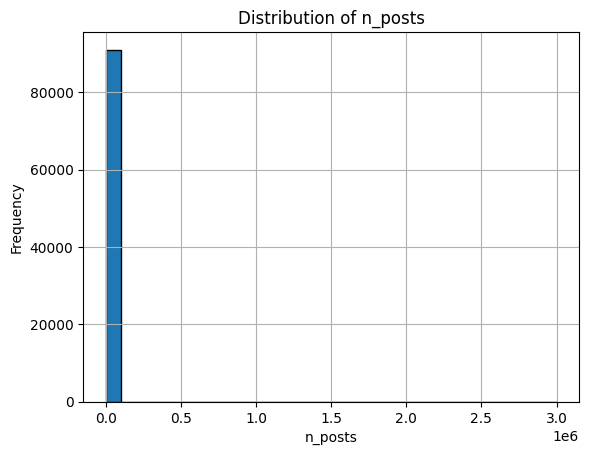

In [19]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'n_posts' is your column
df['n_posts'].hist(bins=30, edgecolor='black')

plt.title('Distribution of n_posts')
plt.xlabel('n_posts')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='datetime'>

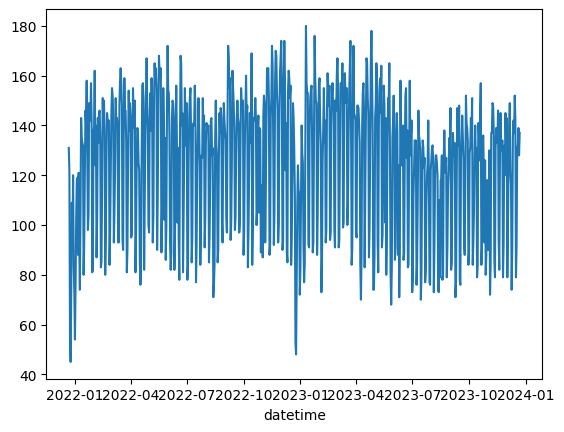

In [21]:
# plot number of articles per day
df.groupby(df['datetime'].dt.date).count()['title'].plot()


<Axes: xlabel='datetime'>

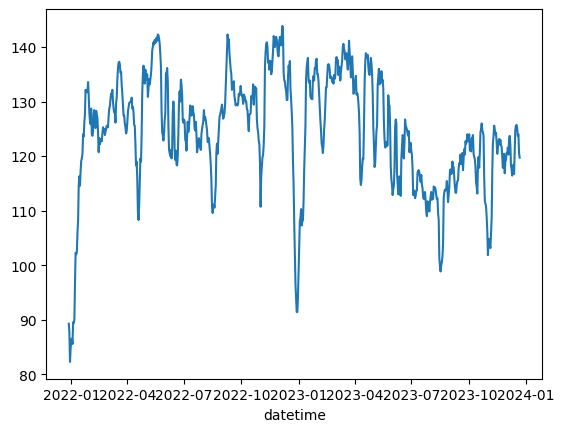

In [22]:
# make a smoothed plot of the number of articles per day
df.groupby(df['datetime'].dt.date).count()['title'].rolling(7).mean().plot()


<module 'matplotlib.pyplot' from 'c:\\Users\\Paul\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

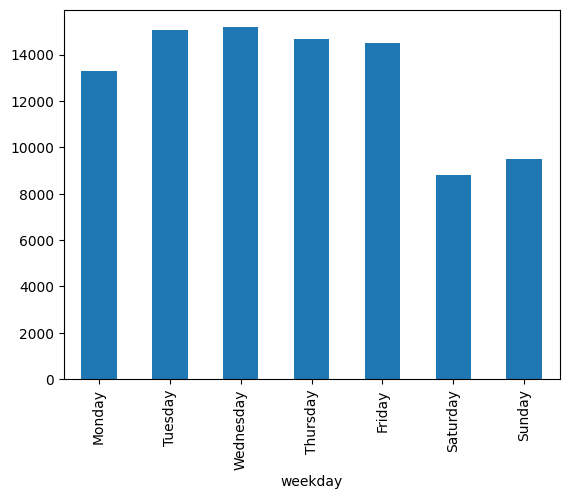

In [23]:
# which weekday has the most articles?
df.groupby('weekday').count()['title'].plot.bar()
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt


In [24]:
# how many articles have a story label? how many don't?
label_counts = df['storylabels'].value_counts(dropna=False)
print(label_counts)
print(f'\nPercentage of articles without a story label: {label_counts.iloc[0] / len(df) * 100:.2f}%')



storylabels
NaN                 70611
Kommentar            2447
Video                2258
Kolumne              1852
Interview            1629
                    ...  
Chronologie             2
ChronologieVideo        1
Livebericht             1
Nachlese                1
Forum+Vorschau          1
Name: count, Length: 63, dtype: int64

Percentage of articles without a story label: 77.61%


<Axes: xlabel='storylabels'>

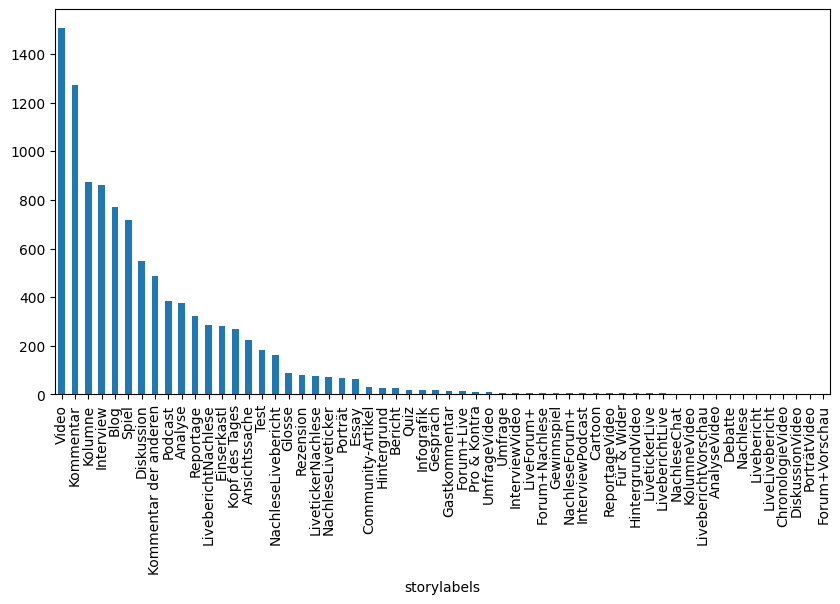

In [7]:
# Plot the number of articles per story label
plt.figure(figsize=(10, 5))
df['storylabels'].value_counts().plot.bar()


In [25]:
# Lets look at the kicker labels
kickers = df['kicker'].value_counts()
print(f'Number of unique kicker labels: {len(kickers)}\n')
# print the 20 most common kicker labels
print(f'Most common kicker labels:\n{kickers[:20]}\n')


Number of unique kicker labels: 26177

Most common kicker labels:
kicker
Fußball                 1483
Nachrichtenüberblick    1302
Sudoku                  1209
Krieg in der Ukraine    1203
Netzpolitik              825
USA                      741
Bundesliga               725
Tennis                   701
Switchlist               683
TV-Tagebuch              674
Sport                    634
Etat-Überblick           593
Wintersport              574
Hans Rauscher            563
Coronavirus              510
Thema des Tages          509
Eishockey                487
Deutschland              474
IT-Business              466
Wien                     433
Name: count, dtype: int64



<Figure size 1000x500 with 0 Axes>

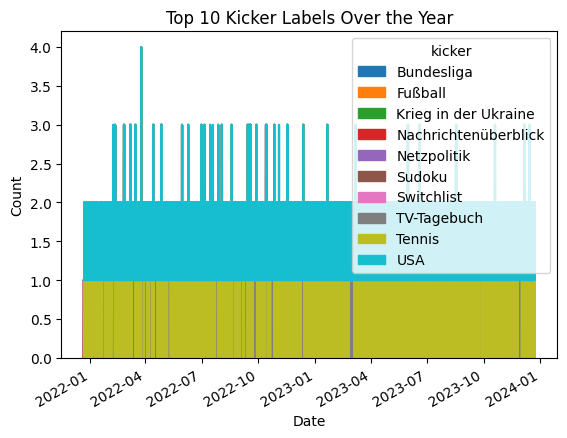

In [27]:
# plot them as a stacked chart, but it looks like sh*t, look at this later
top_10_labels = df['kicker'].value_counts().nlargest(10).index
filtered_df = df[df['kicker'].isin(top_10_labels)]

pivot_df = filtered_df.pivot_table(index='datetime', columns='kicker', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 5))
pivot_df.plot.area(stacked=True)
plt.title('Top 10 Kicker Labels Over the Year')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

## Machine learning
**TODO:**
* do we need to normalize some things?
* train/test split yada yada..